# Jacobian Linearization Example

In this example, we will investigate how accurate a simulation using jacobian linearization is compared to the true nonlinear system dynamics. The system in this scenario is a water mixing tank. There is a hot water source and a cold water source and the goal is to acheive water of a specific temperature. The following nonlinear equations govern the system:

\begin{equation}
\begin{split}
\dot{h}(t) &= \frac{1}{A_T}(q_C(t) + q_H(t) - C_DA_o\sqrt{2gh(t})) \\
\dot{T}_T(t) &= \frac{1}{h(t)A_T}(q_C(t)[T_C - T_T(t)] + q_H(t)[T_H - T_T(t)]) \\
\end{split}
\end{equation}

$h(t)$ is the height of the tank, $q_C$ is the flow rate of the cold water, $q_H$ is the flow rate of the hot water, These flow rates are our controls. $A_T$, $C_D$, $g$, and $A_o$ are just some constants.

Let's define some constraints for our simulation.

\begin{equation}
\begin{split}
h(0) &= 1.10 \\
T_T(0) &= 81.5 \\
q_C(0) &= \begin{cases} 0.022 & 0 \leq t \leq 25 \\
                       0.043 & 25 \leq t \leq 100 \\ \end{cases} \\
q_H(0) &= \begin{cases} 0.14 & 0 \leq t \leq 60 \\
                       0.105 & 60 \leq t \leq 100 \\ \end{cases} \\
\end{split}
\end{equation}

We picked these numbers because they're reasonably close to the equilibrium condition of $h=1, T_T=75$. Of course the control inputs are totally arbitrary, we just want to see the impact they have on height and water temperature.

For the true system dynamics, the simulation is simple. Given the starting variable, calculate $h(0)$ and $T_T(0)$. Then, use these new outputs as the inputs at the next time step.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False

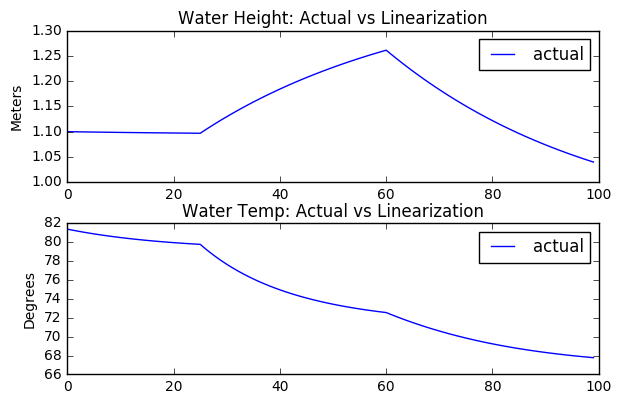

In [22]:
def nonlinear_simulate(q_C, q_H, h0, T0, T_C=10, T_H=90, A_o=0.05, A_T=3, C_D=0.7, g=9.8, debug=False):
    h_t = h0
    T_T_t = T0
    H = []
    T = []
    for t in range(100):
        q_C_t = q_C(t)
        q_H_t = q_H(t)
        if debug:
            print(h_t, T_T_t, q_C_t, q_H_t)
        T_T_t += (q_C_t * (T_C - T_T_t) + q_H_t * (T_H - T_T_t)) / (h_t * A_T) 
        h_t += (q_C_t + q_H_t - C_D * A_o * np.sqrt(2 * g * h_t)) / A_T
        H.append(h_t)
        T.append(T_T_t)
        
    return H, T

def q_C(t):
    if t <= 25:
        return 0.022
    else:
        return 0.043
    
def q_H(t):
    if t <= 60:
        return 0.14
    else:
        return 0.105
    
def q_C_eq(t):
    return 0.029
    
def q_H_eq(t):
    return 0.126
    
actual_H, actual_T = nonlinear_simulate(q_C, q_H, 1.1, 81.5)


fig, ax = plt.subplots(nrows=2, ncols=1)
fig.tight_layout()
ax[0].set_ylim([1, 1.3])
ax[0].plot(actual_H, label="actual")
ax[0].set_title("Water Height: Actual vs Linearization")
ax[0].set_ylabel("Meters")
ax[0].legend()

ax[1].set_ylim([66, 82])
ax[1].plot(actual_T, label="actual")
ax[1].set_title("Water Temp: Actual vs Linearization")
ax[1].set_ylabel("Degrees")
ax[1].legend()

plt.show()